# VARIABLES CRÍTICAS PARA PRONOSTICAR EL VALOR DE INMUEBLES EN CDMX #

El primer paso del proyecto se basa en realizar un anális de conglomerados donde apoyados por los profesores tendremos acceso a una base de datos con información de bienes inmuebles de las diferentes alcaldías de la CDMX. 

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



# 1. DEFINICIÓN DEL PROBLEMA

En 2023 el INEGI informó que la acitivad económica del primer subsector;renta de bienes inmuebles, generó alrededor de 9.7 millones de empleos en México, equivalente al 11% de la PEA y de 2005  2019 aportó entre el 6% y 11% del PIB anual.  
Ante el creciente desarrollo del mercado y el uso de nuevas tecnologías, el CEO de Erich Zann y Asociados (destacada compañía inmobiliaria en CDMX) pide al gerente de Mercadotecnia renovar los procedimientos y tecnologías necesarias para determinar el valor de venta de los bienes raíces que su negocio ofrece en la ciudad.  
Se realizarán cambions en la estartegia de promoción y venta de los inmuebles para destacar el hecho que la empresa utiliza métodos analíticos para identificar las variables clave que determinan el precio de un inmueble.



# 2. DEFINICIÓN DE VARIABLES.

1. Elección de la ubicación. En esta etapa me parece que las variables que mejor describen esta categoría es "Precio_m2", el precio del inmueble está directamente ligado con la ubicación.
2.Variables escenciales. Hace referencia a los requerimentos que necesita una vivienda para ser catalogada como digna, ejemplo de esto es "m2_construido",Baños", "Recámaras" y "Estacionamiento".
3. Variables comodidades. Son características del inmueble que aunque no son escenciales los clientes las adquieren como una comodidad, las cuales serán "Alberca","Gimnasio","Terraza".

In [15]:
#Primer visualización de la base de datos.
df = pd.read_excel("RetoConglomerados.xlsx")
df.head(10)

,Alcaldia,Colonia,X1,X2,X3,X4,X5,X6,X7,X8,...,Gimnasio,Amueblado,Alberca,Terraza,Elevador,m2_construido,Baños,Recamaras,Lugares_estac,Precio_m2
0,La Magdalena Contreras,San Jerónimo Líndice,1.857685,5.622805,47.821312,21.693800,32.202925,4.541026,0.705162,0.167438,...,Si,No,No,Si,Si,150.0,2.0,3,2,6500.00
1,Tlahuac,Xochicalli,1.536913,4.495493,46.562121,20.048451,26.778072,5.035624,0.957675,0.096289,...,No,No,No,No,No,51.0,1.0,2,1,1200.00
2,Cuajimalpa,Bosques de las Lomas,1.550909,5.758377,44.360119,18.897734,24.415938,4.172703,0.428650,0.061151,...,Si,No,No,Si,Si,305.0,3.0,3,3,17500.00
3,Tlahuac,La Turba,1.536913,4.495493,46.562121,20.048451,26.778072,5.035624,0.957675,0.096289,...,No,No,No,No,No,42.0,1.0,2,1,1046.40
4,Tlahuac,Miguel Hidalgo,1.536913,4.495493,46.562121,20.048451,26.778072,5.035624,0.957675,0.096289,...,No,No,No,No,No,50.0,1.0,2,1,1195.00
5,Tlahuac,Los Olivos,1.536913,4.495493,46.562121,20.048451,26.778072,5.035624,0.957675,0.096289,...,No,No,No,No,No,80.0,1.0,2,1,387.66
6,Miguel Hidalgo,Polanco,0.611027,5.569242,35.542918,10.499484,18.457227,1.058463,0.068491,0.026194,...,Si,No,No,Si,Si,163.0,2.0,3,2,12738.00
7,Alvaro Obregon,Jardines del Pedregal,1.339167,5.683630,42.852474,17.831208,23.737688,3.189615,0.282937,0.026174,...,Si,No,No,Si,Si,144.0,2.5,3,2,7150.00
8,Xochimilco,Santiago Tepalcatlalpan,2.300547,4.569401,46.684362,21.301165,32.138411,6.805507,10.209771,0.172423,...,No,No,No,No,No,50.0,1.0,2,1,2950.00
9,Venustiano Carranza,Moctezuma 2a Sección,1.024373,6.374010,43.624973,16.351225,28.245291,2.280092,0.055234,0.035805,...,No,No,No,No,No,64.0,1.0,2,0,950.00


In [16]:
#Visualizamos el tipo de datos de nuestras variables y verificamos la ausencia de nulos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Alcaldia       658 non-null    object 
 1   Colonia        658 non-null    object 
 2   X1             658 non-null    float64
 3   X2             658 non-null    float64
 4   X3             658 non-null    float64
 5   X4             658 non-null    float64
 6   X5             658 non-null    float64
 7   X6             658 non-null    float64
 8   X7             658 non-null    float64
 9   X8             658 non-null    float64
 10  X9             658 non-null    float64
 11  X10            658 non-null    float64
 12  Cocina_equip   658 non-null    object 
 13  Gimnasio       658 non-null    object 
 14  Amueblado      658 non-null    object 
 15  Alberca        658 non-null    object 
 16  Terraza        658 non-null    object 
 17  Elevador       658 non-null    object 
 18  m2_constru

In [17]:
#Elección preeliminar de las variables
#Características de la zona 7,8,9
#Características del inmueble básicas [12,17,18,19,20,21,22]
#Características del inmueble extras [13,14,15,16]

Conglomerado = df.iloc[ : , [22,18,19,20,21,13,15,16]]
Conglomerado.head()

,Precio_m2,m2_construido,Baños,Recamaras,Lugares_estac,Gimnasio,Alberca,Terraza
0,6500.0,150.0,2.0,3,2,Si,No,Si
1,1200.0,51.0,1.0,2,1,No,No,No
2,17500.0,305.0,3.0,3,3,Si,No,Si
3,1046.4,42.0,1.0,2,1,No,No,No
4,1195.0,50.0,1.0,2,1,No,No,No


In [18]:
#Conglomerado["Cocina_equip"]=Conglomerado["Cocina_equip"].replace("Si",1)
#Conglomerado["Cocina_equip"]=Conglomerado["Cocina_equip"].replace("Si ",1)

#Conglomerado["Cocina_equip"]=Conglomerado["Cocina_equip"].replace("No",0)

#Conglomerado["Elevador"]=Conglomerado["Elevador"].replace("Si",1)
#Conglomerado["Elevador"]=Conglomerado["Elevador"].replace("Si ",1)
#Conglomerado["Elevador"]=Conglomerado["Elevador"].replace("si",1)
#Conglomerado["Elevador"]=Conglomerado["Elevador"].replace("No",0)

Conglomerado["Baños"]=Conglomerado["Baños"].replace("Si",1)
Conglomerado["Baños"]=Conglomerado["Baños"].replace("No",0)

Conglomerado["Recamaras"]=Conglomerado["Recamaras"].replace("Si",1)
Conglomerado["Recamaras"]=Conglomerado["Recamaras"].replace("No",0)

Conglomerado["Lugares_estac"]=Conglomerado["Lugares_estac"].replace("Si",1)
Conglomerado["Lugares_estac"]=Conglomerado["Lugares_estac"].replace("No",0)



Conglomerado["Gimnasio"]=Conglomerado["Gimnasio"].replace("Si",1)
Conglomerado["Gimnasio"]=Conglomerado["Gimnasio"].replace("Si ",1)
Conglomerado["Gimnasio"]=Conglomerado["Gimnasio"].replace("No",0)
Conglomerado["Gimnasio"]=Conglomerado["Gimnasio"].replace("No ",0)


#Conglomerado["Amueblado"]=Conglomerado["Amueblado"].replace("Si",1)
#Conglomerado["Amueblado"]=Conglomerado["Amueblado"].replace("Si ",1)
#Conglomerado["Amueblado"]=Conglomerado["Amueblado"].replace("No",0)
#Conglomerado["Amueblado"]=Conglomerado["Amueblado"].replace("No ",0)

Conglomerado["Alberca"]=Conglomerado["Alberca"].replace("Si",1)
Conglomerado["Alberca"]=Conglomerado["Alberca"].replace("si ",1)
Conglomerado["Alberca"]=Conglomerado["Alberca"].replace("Si ",1)
Conglomerado["Alberca"]=Conglomerado["Alberca"].replace("No",0)
Conglomerado["Alberca"]=Conglomerado["Alberca"].replace("No ",0)

Conglomerado["Terraza"]=Conglomerado["Terraza"].replace("Si",1)
Conglomerado["Terraza"]=Conglomerado["Terraza"].replace("Si ",1)
Conglomerado["Terraza"]=Conglomerado["Terraza"].replace("No",0)
Conglomerado["Terraza"]=Conglomerado["Terraza"].replace("No ",0)




C:\Users\Carlos Casillas\AppData\Local\Temp\ipykernel_28440\1909231935.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Conglomerado["Baños"]=Conglomerado["Baños"].replace("Si",1)
C:\Users\Carlos Casillas\AppData\Local\Temp\ipykernel_28440\1909231935.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Conglomerado["Baños"]=Conglomerado["Baños"].replace("No",0)
C:\Users\Carlos Casillas\AppData\Local\Temp\ipykernel_28440\1909231935.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [19]:
#Revisipon para confirmar que todas las variables contienen tipo de dato numérico.
Conglomerado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Precio_m2      658 non-null    float64
 1   m2_construido  658 non-null    float64
 2   Baños          658 non-null    float64
 3   Recamaras      658 non-null    int64  
 4   Lugares_estac  658 non-null    int64  
 5   Gimnasio       658 non-null    int64  
 6   Alberca        658 non-null    int64  
 7   Terraza        658 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 41.3 KB


# 3. METODOLOGÍA SIMILITUD O DISTANCIA.

Utilizamos la distancia euclidiana, la cual busca calcular la similitud de la distancia entre los datos.

In [20]:
#Código utilizado de la clase "Análisis de conglomerados".
#Código realizado con la ayuda de ChatGPT
# Función para calcular la distancia euclidiana entre dos filas
def euclidean_distance(row1, row2):
    return np.sqrt(np.sum((row1 - row2) ** 2))

# Crear una matriz de distancias euclidianas
distances = np.zeros((len(Conglomerado), len(Conglomerado)))

for i in range(len(Conglomerado)):
    for j in range(i, len(Conglomerado)):
        dist = euclidean_distance(Conglomerado.iloc[i], Conglomerado.iloc[j])
        distances[i, j] = dist
        distances[j, i] = dist  # La matriz es simétrica, por lo que llenamos ambos lados

# Crear un DataFrame de distancias
distance_clusters = pd.DataFrame(distances, index=Conglomerado.index, columns=Conglomerado.index)

distance_clusters #ahora contiene las distancias euclidianas entre todas las filas de tu DataFrame


,0,1,2,3,4,5,6,7,8,9,...,648,649,650,651,652,653,654,655,656,657
0,0.000000,5300.925014,11001.092082,5454.669739,5305.942895,6112.741224,6238.013546,650.027884,3551.408875,5550.666987,...,1017.504300,3146.867318,5600.723614,5450.647760,2000.004500,710.035379,4300.860495,5405.893165,5850.855066,3411.295648
1,5300.925014,0.000000,16301.979236,153.863446,5.099020,812.857476,11538.543799,5950.727287,1750.000286,250.339769,...,6317.355539,8447.447432,300.134970,150.748134,7300.618741,4592.051202,1000.084496,112.547384,550.000909,1890.007407
2,11001.092082,16301.979236,0.000000,16455.702141,16306.994236,17113.819453,4764.116917,10351.252207,14552.234742,16551.755103,...,9984.751474,7854.662750,16601.808215,16451.736443,9001.404502,11710.012350,15301.898314,16406.969004,16851.929741,14412.151366
3,5454.669739,153.863446,16455.702141,0.000000,148.815187,659.835122,11692.226330,6104.452736,1903.616810,98.883568,...,6471.046543,8601.145367,147.502407,24.268498,7454.326124,4745.742635,1153.809759,67.932625,396.480718,2043.648688
4,5305.942895,5.099020,16306.994236,148.815187,0.000000,807.897194,11543.553309,5955.742376,1755.000000,245.401711,...,6322.365934,8452.458860,295.169443,145.880088,7305.631390,4597.061479,1005.097508,108.237302,545.000000,1895.010290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,710.035379,4592.051202,11710.012350,4745.742635,4597.061479,5404.173678,6946.494975,1358.946095,2842.222940,4841.926914,...,1725.305202,3855.404593,4891.955768,4741.915145,2708.608543,0.000000,3591.970941,4697.368835,5142.033765,2702.142158
654,4300.860495,1000.084496,15301.898314,1153.809759,1005.097508,1812.410626,10538.465258,4950.647054,750.130655,1250.000400,...,5317.274490,7447.363904,1300.006154,1150.001739,6300.534342,3591.970941,0.000000,1105.867042,1550.063225,890.037640
655,5405.893165,112.547384,16406.969004,67.932625,108.237302,706.852862,11643.788923,6055.801034,1855.991895,146.775044,...,6422.621346,8552.637698,196.748351,50.536260,7405.772135,4697.368835,1105.867042,0.000000,446.239749,1995.850123
656,5850.855066,550.000909,16851.929741,396.480718,545.000000,264.049760,12088.528364,6500.680137,2300.000000,300.328154,...,6867.336893,8997.423010,250.199920,400.319872,7850.587558,5142.033765,1550.063225,446.239749,0.000000,2440.007992


# 4. PROCEDIMIENTO DE AGRUPAMIENTO.

En este caso decidimos realizar el procedimiento k-means ya que catalogamos la naturaleza de la información para realizar un análisis no jerárquico, los principales componentes se enfocan en:
- No realizamos una estructura de clustering jerárquicas.
- Dividiremos cada punto de datos en grupos sin considerar la existencia de clusters dentro de otros clusters.

# 5. DECIDIR NÚMERO DE CONGLOMERADOS.

Para esta técnica utilizaremos la metodología del codo, además, nos apoyaremos en una segunda opinión llevando a cabo un gráfico dendograma.

c:\Users\Carlos Casillas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Carlos Casillas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Carlos Casillas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Carlos Casillas\AppData\Local\Programs\Python\

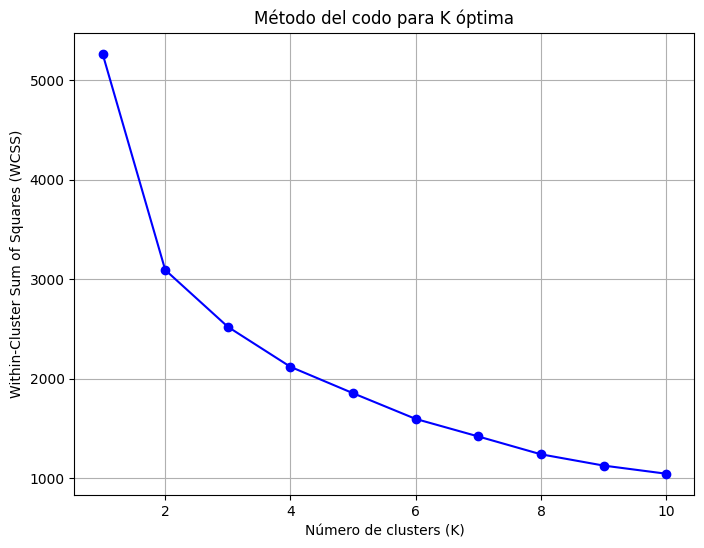

In [21]:
# Se estandarizan los valores
scaler = StandardScaler()
X = scaler.fit_transform(Conglomerado)

# Se calcula el wcss (Suma de cuadrados de las distancias intra-cluster)
# se almacena el valor en la lista wcss
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Se grafica la curva.
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Método del codo para K óptima')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

La técnica del codo define que el número ideal de clusters (donde existe la mayor homogeneidad internamnete y mayor diferencia entre clusters) es de 2.

In [22]:
#Dendograma
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Estandarización (esto afecta si no se realiza)
scaler = StandardScaler()
X_std = scaler.fit_transform(Conglomerado)

In [23]:
# se realiza el clustering con la función linkage
linked = linkage(X_std, method='ward') #como podrán observar, son las distancias

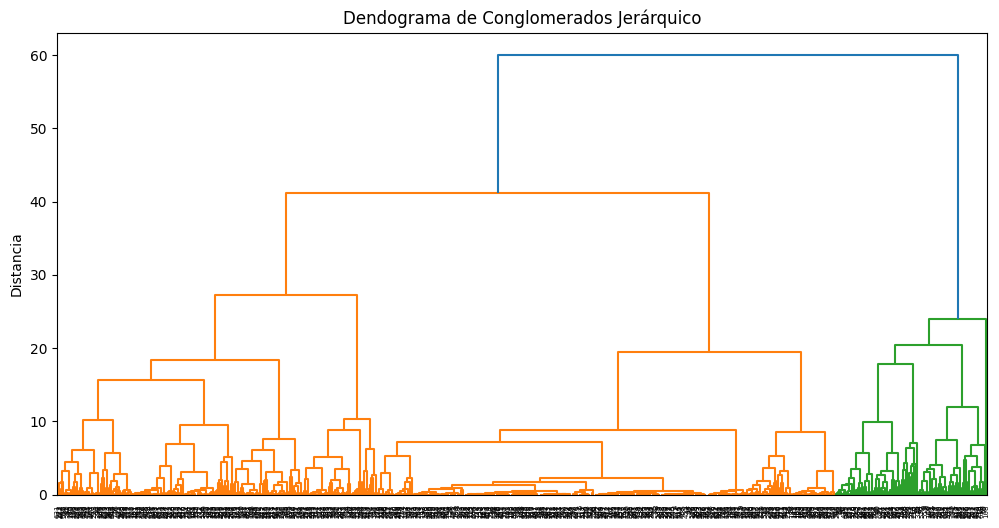

In [24]:
# Create a dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z=linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendograma de Conglomerados Jerárquico')
plt.ylabel('Distancia')
plt.show()

De igual manera, el dendograma nos indica que el número ideal de clusters para el análisis es de 2.

# 6. INTERPRETAR Y ELABORAR UN PERFIL DE CONGLOMERADOS.

In [25]:
#Elaboración de clusters
###Ya con el número de clusters seleccionados:

from sklearn.cluster import KMeans
# Elegimos el número de clusters (K)
k = 2

# Construimos el modelo de K medias
kmeans = KMeans(n_clusters=k, random_state=0)

# construimos el modelo con los datos
kmeans.fit(X_std)

# Tomamos las posiciones de los clusters y tomamos los centroides.
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

c:\Users\Carlos Casillas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


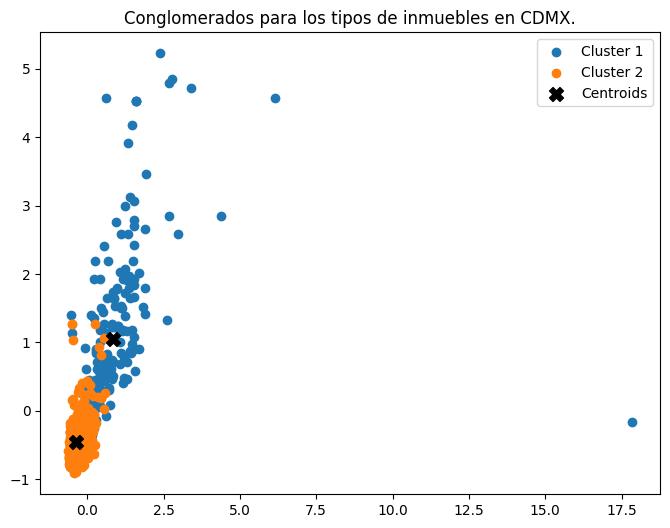

In [26]:
# Realizamos nuestra visualización de los resultados.
plt.figure(figsize=(8, 6))

# Para cada punto de datos, corresponde un color por la etiqueta de cluster
for i in range(k):
    plt.scatter(X_std[cluster_labels == i, 0], X_std[cluster_labels == i, 1], label=f'Cluster {i + 1}')

# Agregamos los centroides
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=100, c='black', label='Centroids')

#plt.xlabel('life expensive  (Estandarizada)')
#plt.ylabel('gdp Per cápita (Estandarizada)')
plt.title('Conglomerados para los tipos de inmuebles en CDMX.')
plt.legend()
plt.show()

El gráfico no es práctico debido a la interacción de múltiples variables, dado esta situación utilicé el método PCA.

In [29]:
Conglomerado["KMeans_Clusters"] = kmeans.labels_ 

C:\Users\Carlos Casillas\AppData\Local\Temp\ipykernel_28440\1965337842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Conglomerado["KMeans_Clusters"] = kmeans.labels_


In [34]:
#De un video en YouTube
#Tengo mis dudas del resultado ya que al escalar las variables los datos 
#tendrían que tomar valores entre 0 y 1.
#https://www.youtube.com/watch?v=s6PSSzeUMFk&t=541s

pca = PCA(n_components =2)
pca_Conglomerado = pca.fit_transform(Conglomerado)
pca_Conglomerado_df =pd.DataFrame(data=pca_Conglomerado,columns=["Componente_1","Componente_2"])
pca_nombres_Conglomerado=pd.concat([pca_Conglomerado_df,Conglomerado[["KMeans_Clusters"]]],axis=1)

pca_nombres_Conglomerado

,Componente_1,Componente_2,KMeans_Clusters
0,2216.480647,-32.045598,0
1,-3084.057989,31.949361,1
2,13217.264709,-114.357798,0
3,-3237.714099,39.933515,1
4,-3089.064487,32.916225,1
...,...,...,...
653,1507.959018,14.284678,1
654,-2083.993930,25.558558,1
655,-3189.357923,-7.753143,1
656,-3634.052587,29.314894,1


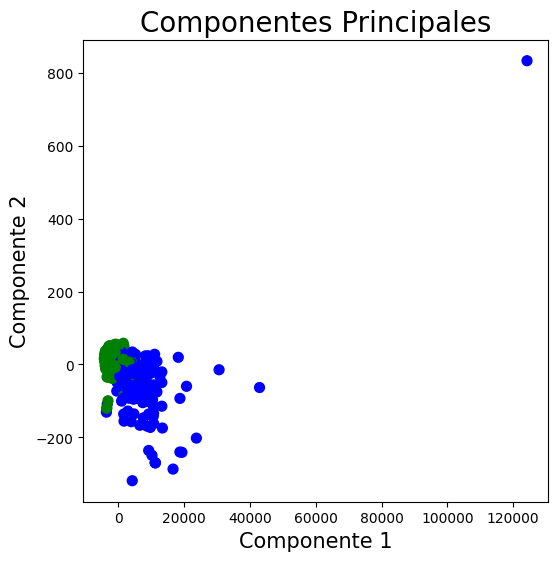

In [36]:
fig = plt.figure(figsize = (6,6))

ax =fig.add_subplot(1,1,1)
ax.set_xlabel("Componente 1", fontsize = 15)
ax.set_ylabel("Componente 2", fontsize = 15)
ax.set_title("Componentes Principales",fontsize =20)

color_theme = np.array(["blue","green","orange"])
ax.scatter(x = pca_nombres_Conglomerado.Componente_1, y=pca_nombres_Conglomerado.Componente_2,
           c=color_theme[pca_nombres_Conglomerado.KMeans_Clusters],s=50)
plt.show()
